# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | After the nightmare of get...
1,✅ Trip Verified | Prior to boarding a gate a...
2,✅ Trip Verified | I flew from Amsterdam to L...
3,"✅ Trip Verified | First the good news, the clu..."
4,✅ Trip Verified | I have never travelled wit...


In [5]:
df.to_excel("BA_reviews.xlsx", index=False)

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [14]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Load your scraped data
# Assuming you've saved the reviews in a CSV file
df = pd.read_excel('BA_reviews.xlsx')

# Function for comprehensive text cleaning
def clean_text(text):
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()
        
        # Remove HTML tags
        text = re.sub(r'<.*?>', '', text)
        
        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text)
        
        # Remove email addresses
        text = re.sub(r'\S*@\S*\s?', '', text)
        
        # Remove special characters and numbers
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r'\d+', '', text)
        
        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()
        
        return text
    return ""

# Apply basic cleaning
df['reviews_cleaned'] = df['reviews'].apply(clean_text)

# Advanced cleaning (optional)
def advanced_clean(text):
    if isinstance(text, str):
        # Tokenize
        tokens = nltk.word_tokenize(text)
        
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]
        
        # Lemmatize
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
        
        return ' '.join(tokens)
    return ""

# Apply advanced cleaning
df['processed_text'] = df['reviews_cleaned'].apply(advanced_clean)

# Save the cleaned data
df.to_excel('cleaned_BA_reviews.xlsx', index=False)

# Display sample of cleaned text
print(df[['reviews', 'reviews_cleaned', 'processed_text']].head())

[nltk_data] Downloading package stopwords to C:\Users\Kasandika
[nltk_data]     Andariefli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Kasandika
[nltk_data]     Andariefli\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Kasandika
[nltk_data]     Andariefli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                             reviews  \
0  ✅ Trip Verified |   After the nightmare of get...   
1  ✅ Trip Verified |   Prior to boarding a gate a...   
2  ✅ Trip Verified |   I flew from Amsterdam to L...   
3  ✅ Trip Verified | First the good news, the clu...   
4  ✅ Trip Verified |   I have never travelled wit...   

                                     reviews_cleaned  \
0  trip verified after the nightmare of getting t...   
1  trip verified prior to boarding a gate agent s...   
2  trip verified i flew from amsterdam to las veg...   
3  trip verified first the good news the club sui...   
4  trip verified i have never travelled with brit...   

                                      processed_text  
0  trip verified nightmare getting triple securit...  
1  trip verified prior boarding gate agent seemed...  
2  trip verified flew amsterdam la vega layover h...  
3  trip verified first good news club suite huge ...  
4  trip verified never travelled british airway f..

# Start Running Here

## Word Cloud

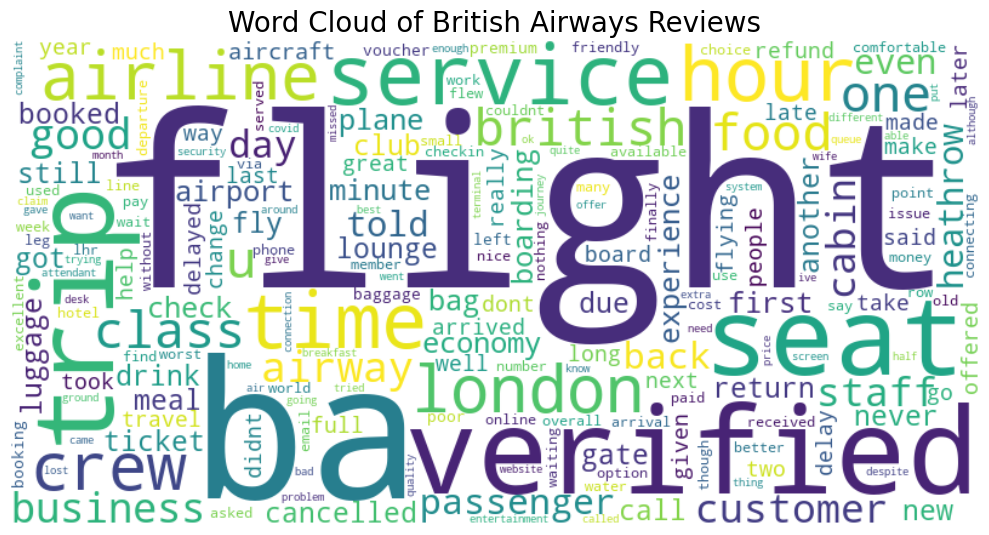

In [1]:
# Import necessary libraries for visualization
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

# Load the cleaned data
df = pd.read_excel('cleaned_BA_reviews.xlsx')

# Create a word cloud from processed text
def generate_wordcloud(text_series, title):
    # Combine all text into one string
    text = ' '.join(text_series.dropna().astype(str))
    
    # Generate the word cloud
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white',
        max_words=200,
        contour_width=3,
        contour_color='steelblue',
        collocations=False
    ).generate(text)
    
    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.tight_layout()
    plt.show()
    
# Generate word cloud from processed text (after stopword removal and lemmatization)
generate_wordcloud(df['processed_text'], 'Word Cloud of British Airways Reviews')

### Word Cloud - Sentiment Analysis

In [2]:
from textblob import TextBlob
import seaborn as sns

C:\Users\Kasandika Andariefli\AppData\Local\Temp\ipykernel_40880\1783911987.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='sentiment_category', data=df, palette={'Positive': 'green', 'Neutral': 'gray', 'Negative': 'red'})


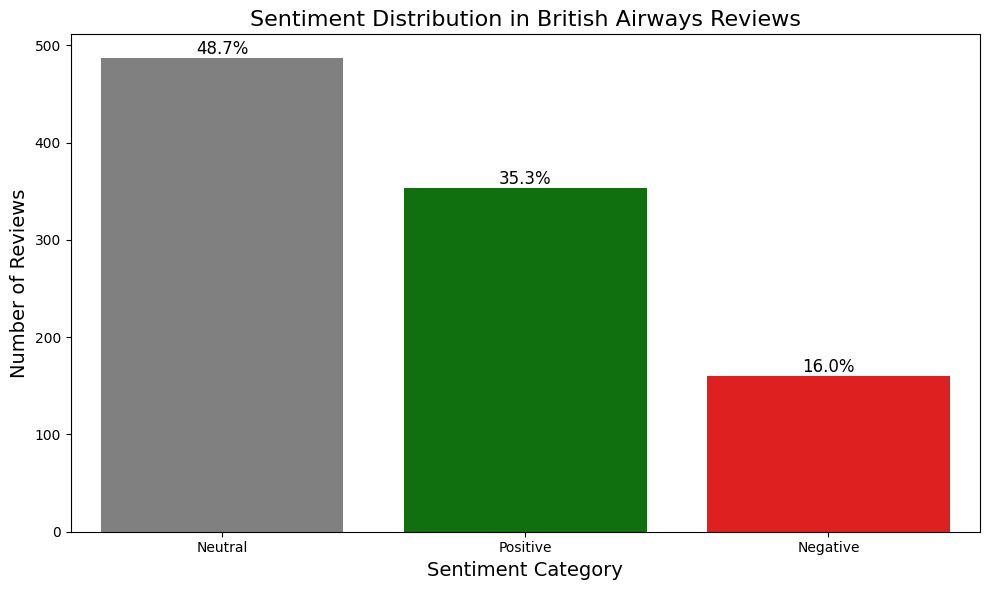

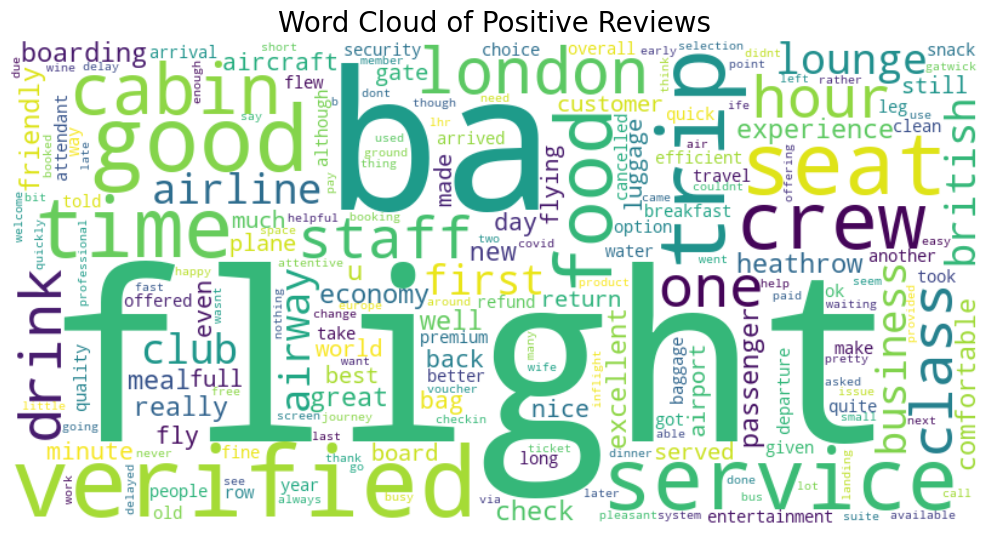

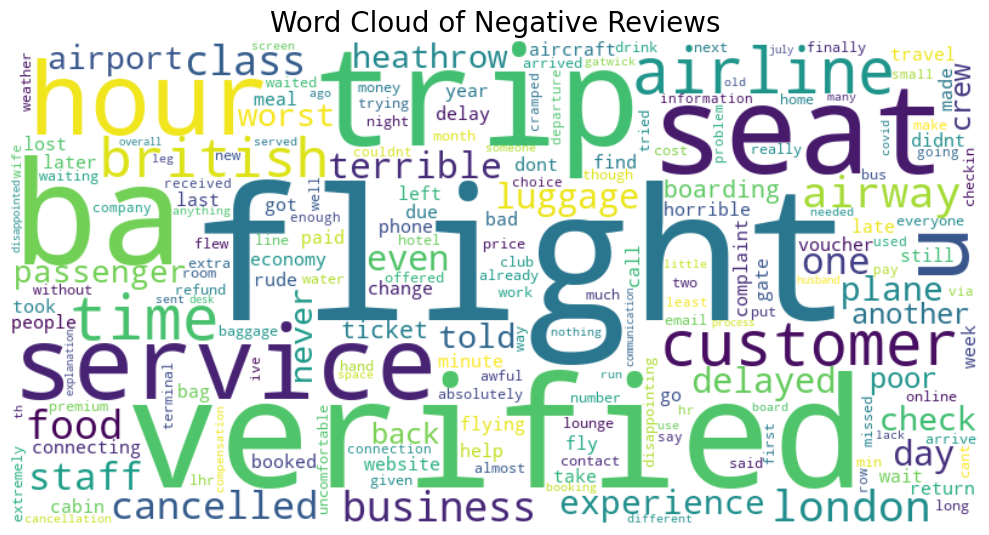

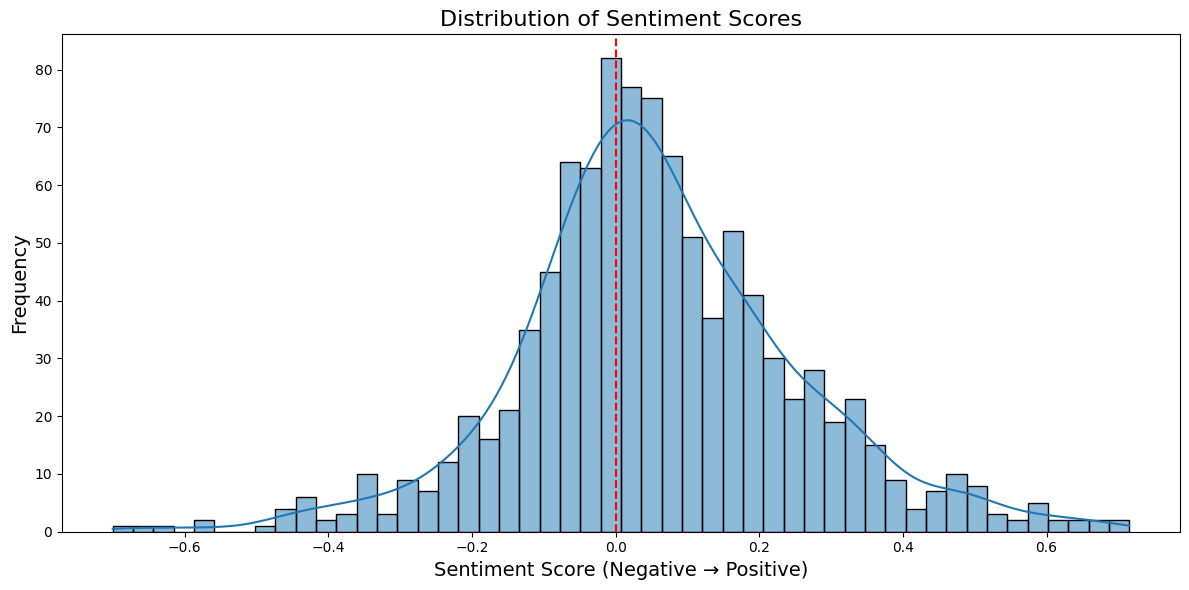

In [3]:
# Function to get sentiment polarity (-1 to 1 scale, where -1 is negative, 0 is neutral, 1 is positive)
def get_sentiment(text):
    if isinstance(text, str):
        return TextBlob(text).sentiment.polarity
    return 0

df['sentiment_score'] = df['reviews_cleaned'].apply(get_sentiment)

# Categorize sentiment
def categorize_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['sentiment_score'].apply(categorize_sentiment)

# Count the sentiment categories
sentiment_counts = df['sentiment_category'].value_counts()

# Display sentiment distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='sentiment_category', data=df, palette={'Positive': 'green', 'Neutral': 'gray', 'Negative': 'red'})

# Add percentage labels
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height/total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12)

plt.title('Sentiment Distribution in British Airways Reviews', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.tight_layout()
plt.show()

# Create separate word clouds for positive and negative reviews
positive_reviews = df[df['sentiment_category'] == 'Positive']['processed_text']
negative_reviews = df[df['sentiment_category'] == 'Negative']['processed_text']

# Generate word clouds by sentiment
generate_wordcloud(positive_reviews, 'Word Cloud of Positive Reviews')
generate_wordcloud(negative_reviews, 'Word Cloud of Negative Reviews')

# Distribution of sentiment scores
plt.figure(figsize=(12, 6))
sns.histplot(df['sentiment_score'], bins=50, kde=True)
plt.title('Distribution of Sentiment Scores', fontsize=16)
plt.xlabel('Sentiment Score (Negative → Positive)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.axvline(x=0, color='red', linestyle='--')
plt.tight_layout()
plt.show()

# Bigram & Trigram Analysis
To identify common phrases and topics
* Bigram: two-word phrases
* Trigram: three-word phrases

In [4]:
from nltk import ngrams
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

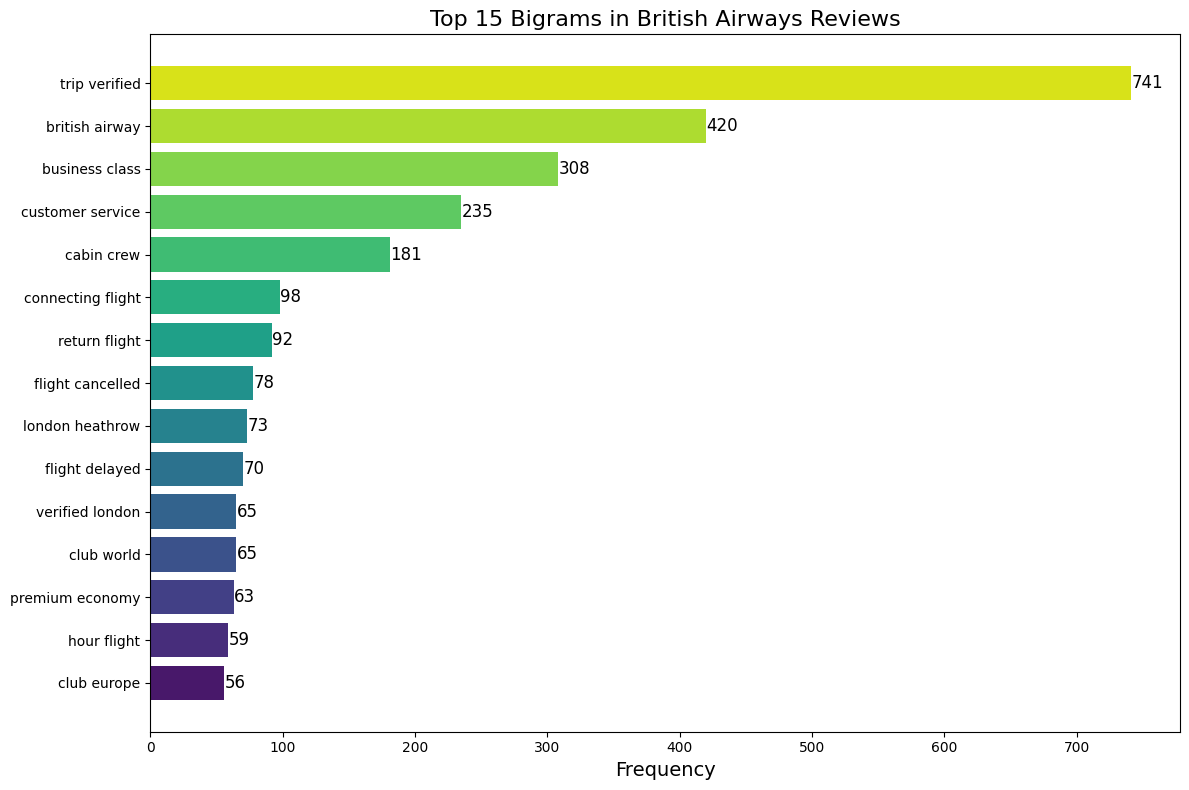

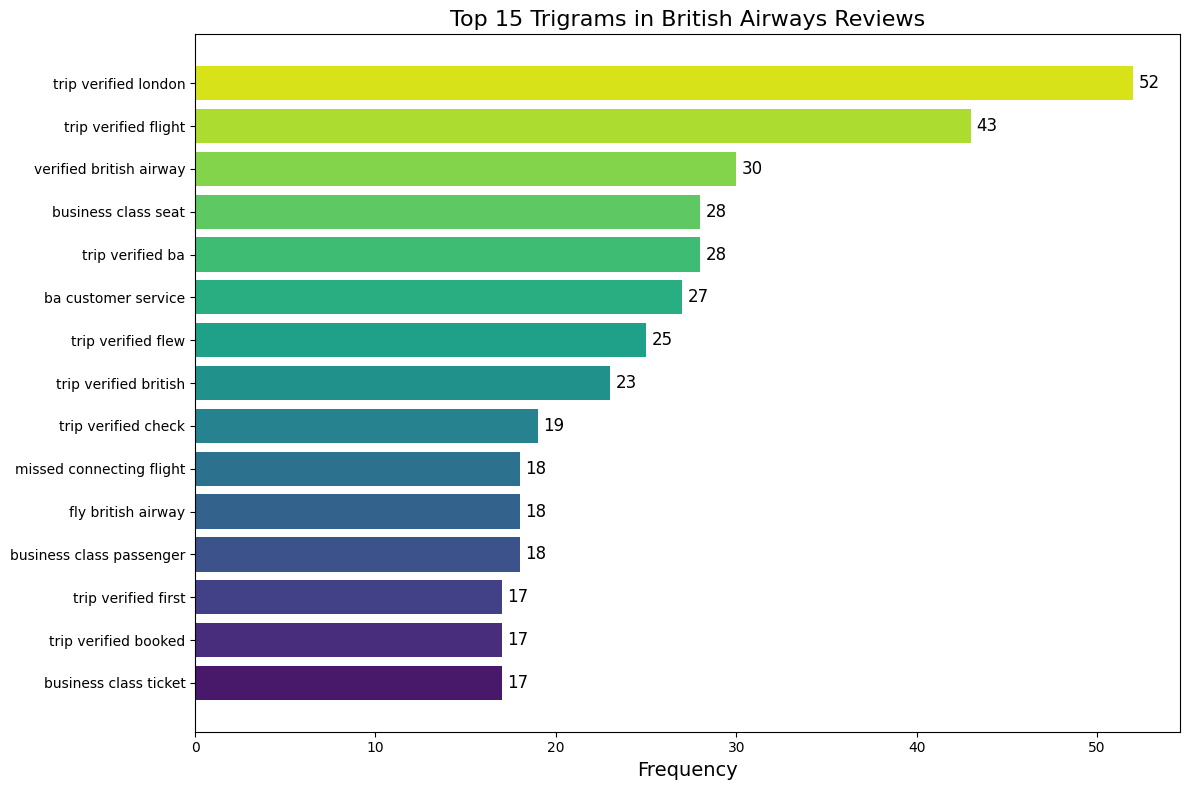

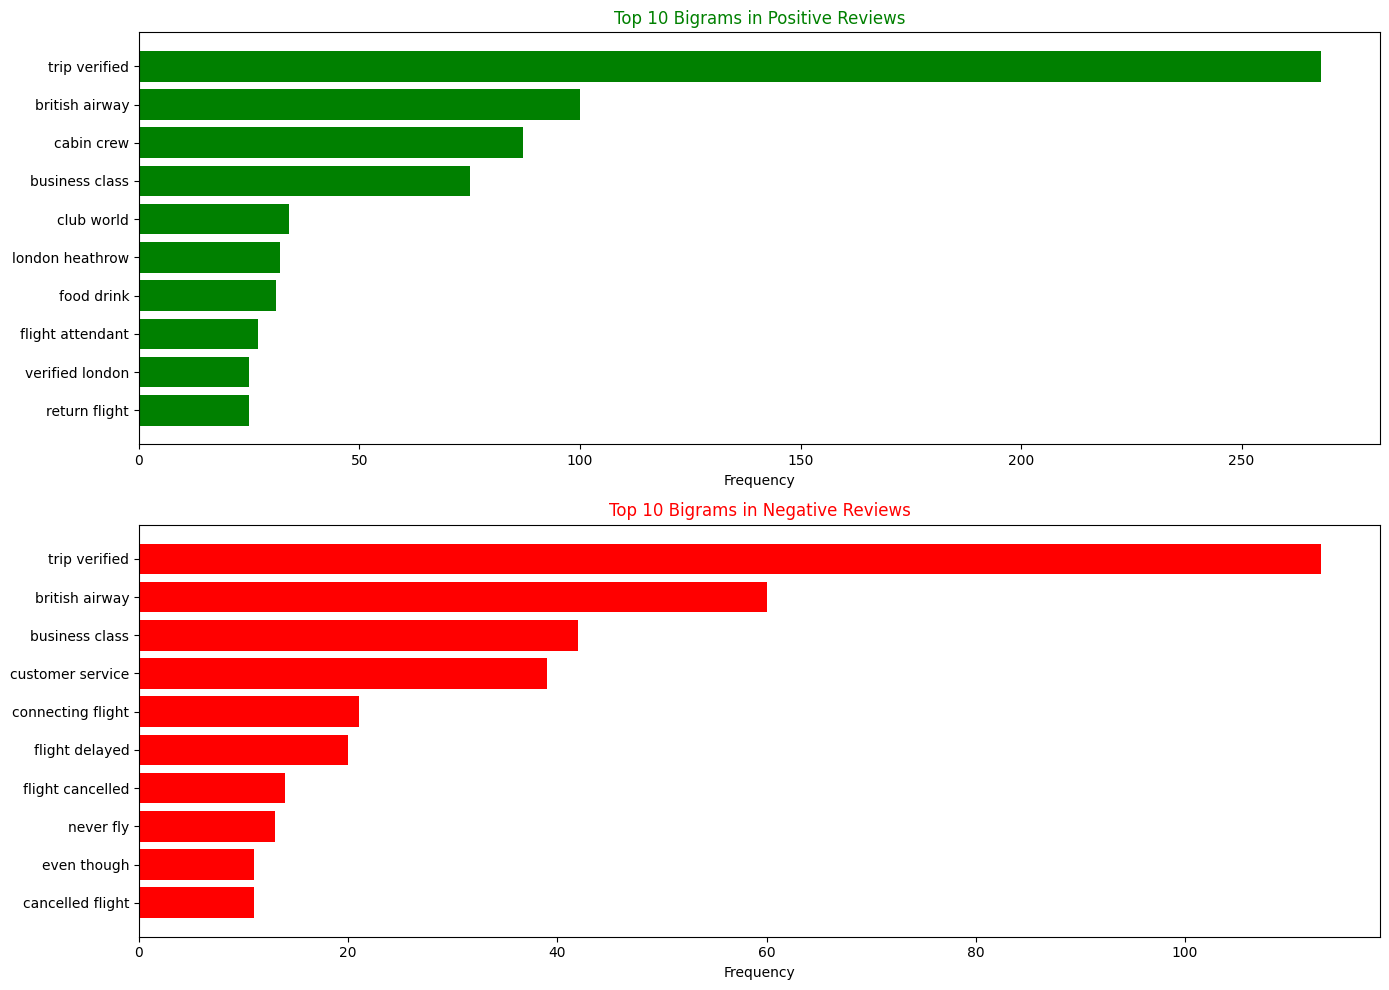

In [ ]:
# Function to extract ngrams from text
def extract_ngrams(text_series, n, top_n=15):
    # Combine all processed texts
    all_words = []
    for text in text_series.dropna():
        if isinstance(text, str):
            # Split the text into words
            words = text.split()
            # Extract n-grams
            n_grams = list(ngrams(words, n))
            all_words.extend(n_grams)
    
    # Count frequencies
    n_gram_freq = Counter(all_words).most_common(top_n)
    
    # Convert to readable format
    n_gram_phrases = [' '.join(gram) for gram, count in n_gram_freq]
    n_gram_counts = [count for gram, count in n_gram_freq]
    
    return n_gram_phrases, n_gram_counts

# Function to plot ngrams with proper descending order
def plot_ngrams(phrases, counts, title):
    plt.figure(figsize=(12, 8))
    
    # Reverse the order to show most frequent at the top
    phrases_reversed = phrases[::-1]
    counts_reversed = counts[::-1]
    
    # Create horizontal bar chart
    bars = plt.barh(range(len(phrases_reversed)), counts_reversed, 
                    color=sns.color_palette("viridis", len(phrases_reversed)))
    
    # Add labels and title
    plt.yticks(range(len(phrases_reversed)), phrases_reversed)
    plt.xlabel('Frequency', fontsize=14)
    plt.title(title, fontsize=16)
    
    # Add count labels to bars
    for i, (count, bar) in enumerate(zip(counts_reversed, bars)):
        plt.text(count + 0.3, bar.get_y() + bar.get_height()/2, 
                 str(count), ha='left', va='center', fontsize=12)
    
    plt.tight_layout()
    plt.show()

# Extract and plot bigrams
bigram_phrases, bigram_counts = extract_ngrams(df['processed_text'], 2)
plot_ngrams(bigram_phrases, bigram_counts, 'Top 15 Bigrams in British Airways Reviews')

# Extract and plot trigrams
trigram_phrases, trigram_counts = extract_ngrams(df['processed_text'], 3)
plot_ngrams(trigram_phrases, trigram_counts, 'Top 15 Trigrams in British Airways Reviews')

# Analyze bigrams by sentiment
positive_bigram_phrases, positive_bigram_counts = extract_ngrams(
    df[df['sentiment_category'] == 'Positive']['processed_text'], 2, top_n=10)

negative_bigram_phrases, negative_bigram_counts = extract_ngrams(
    df[df['sentiment_category'] == 'Negative']['processed_text'], 2, top_n=10)

# Plot sentiment-specific bigrams
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
pos_phrases_reversed = positive_bigram_phrases[::-1]
pos_counts_reversed = positive_bigram_counts[::-1]
plt.barh(range(len(pos_phrases_reversed)), pos_counts_reversed, color='green')
plt.yticks(range(len(pos_phrases_reversed)), pos_phrases_reversed)
plt.xlabel('Frequency')
plt.title('Top 10 Bigrams in Positive Reviews', color='green')

plt.subplot(2, 1, 2)
neg_phrases_reversed = negative_bigram_phrases[::-1]
neg_counts_reversed = negative_bigram_counts[::-1]
plt.barh(range(len(neg_phrases_reversed)), neg_counts_reversed, color='red')
plt.yticks(range(len(neg_phrases_reversed)), neg_phrases_reversed)
plt.xlabel('Frequency')
plt.title('Top 10 Bigrams in Negative Reviews', color='red')

plt.tight_layout()
plt.show()

# Comparison of Common Complaints

In [7]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

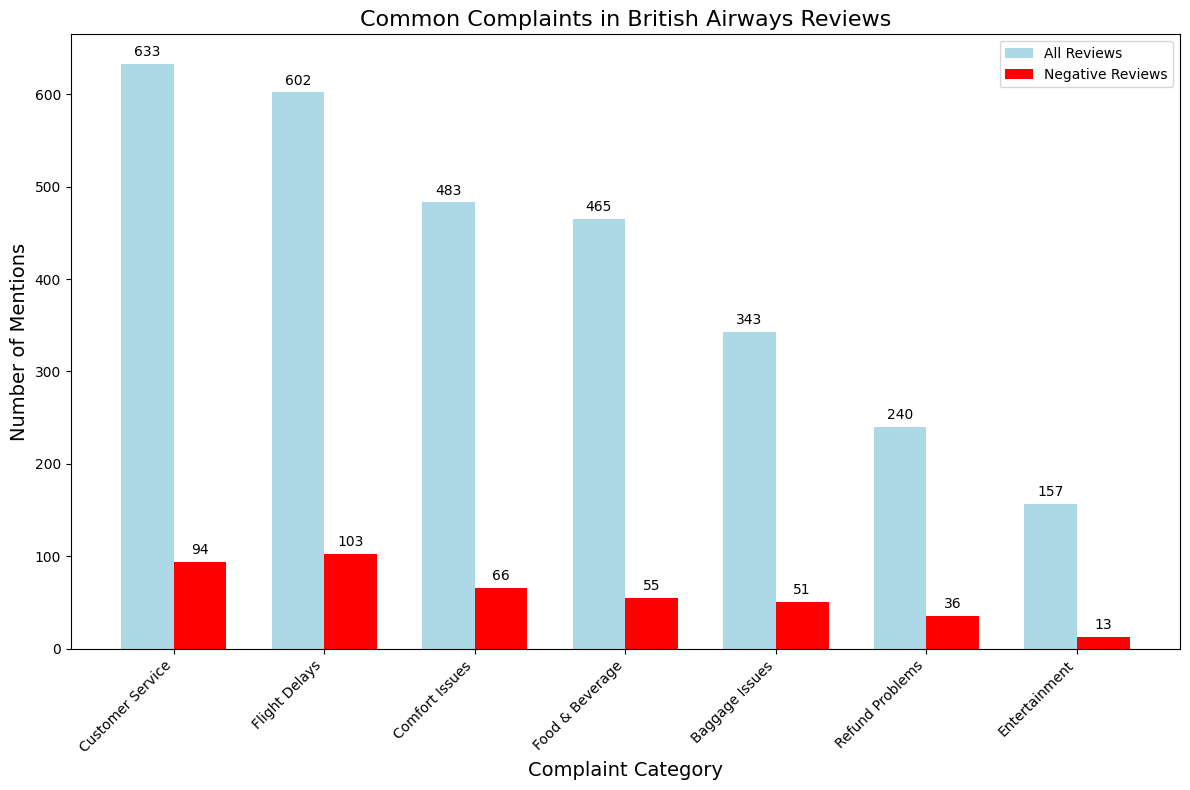

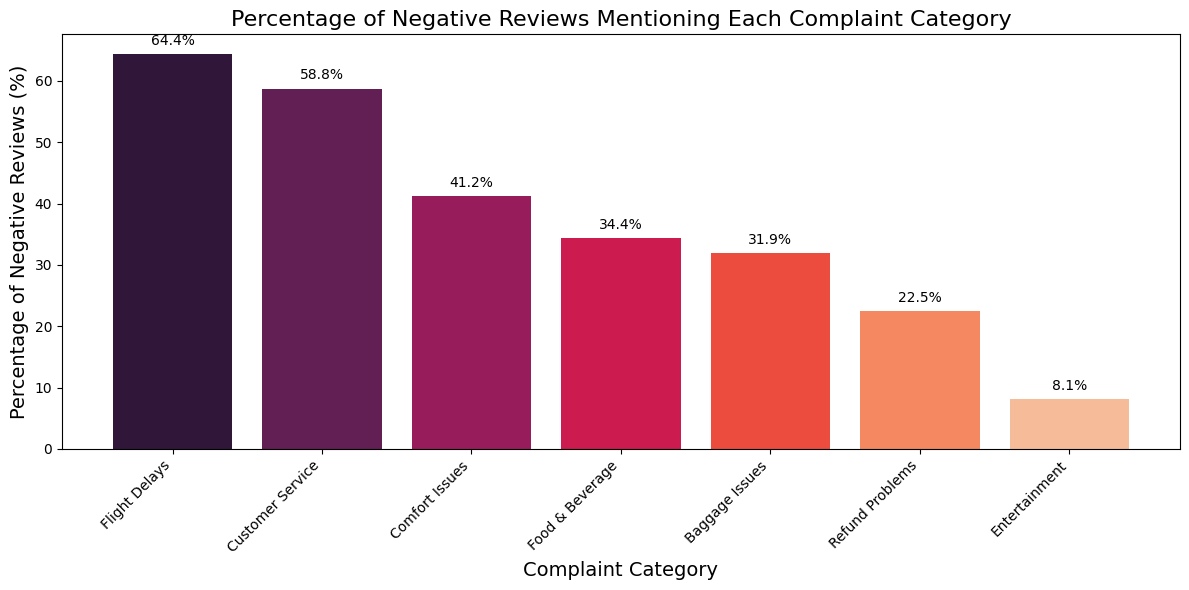

In [8]:
# Define complaint categories and related keywords
complaint_categories = {
    'Flight Delays': ['delay', 'delayed', 'late', 'wait', 'waiting', 'hour', 'hours'],
    'Baggage Issues': ['baggage', 'bag', 'luggage', 'lost', 'damage', 'damaged', 'missing'],
    'Customer Service': ['service', 'staff', 'rude', 'unhelpful', 'unprofessional', 'attitude'],
    'Refund Problems': ['refund', 'money', 'compensation', 'claim', 'reimburse', 'reimbursement'],
    'Food & Beverage': ['food', 'meal', 'drink', 'catering', 'hungry', 'quality'],
    'Comfort Issues': ['seat', 'comfortable', 'uncomfortable', 'cramped', 'space', 'legroom', 'tight'],
    'Entertainment': ['entertainment', 'screen', 'movie', 'film', 'tv', 'shows', 'headphone']
}

# Function to check for complaint keywords in text
def identify_complaints(text, categories):
    if not isinstance(text, str):
        return []
    
    text = text.lower()
    found_categories = []
    
    for category, keywords in categories.items():
        if any(keyword in text for keyword in keywords):
            found_categories.append(category)
    
    return found_categories

# Apply the function to identify complaints in each review
df['complaint_categories'] = df['reviews_cleaned'].apply(
    lambda text: identify_complaints(text, complaint_categories)
)

# Count total complaints by category
all_complaints = []
for complaints in df['complaint_categories']:
    all_complaints.extend(complaints)

complaint_counts = Counter(all_complaints)

# Calculate complaints in negative reviews specifically
negative_complaints = []
for idx, row in df[df['sentiment_category'] == 'Negative'].iterrows():
    negative_complaints.extend(row['complaint_categories'])

negative_complaint_counts = Counter(negative_complaints)

# Create comparison bar chart
categories = list(complaint_categories.keys())
all_counts = [complaint_counts.get(category, 0) for category in categories]
negative_counts = [negative_complaint_counts.get(category, 0) for category in categories]

# Sort categories by total complaint count
sorted_indices = sorted(range(len(all_counts)), key=lambda i: all_counts[i], reverse=True)
sorted_categories = [categories[i] for i in sorted_indices]
sorted_all_counts = [all_counts[i] for i in sorted_indices]
sorted_negative_counts = [negative_counts[i] for i in sorted_indices]

# Plot the comparison
plt.figure(figsize=(12, 8))
x = range(len(sorted_categories))
width = 0.35

plt.bar([i - width/2 for i in x], sorted_all_counts, width, label='All Reviews', color='lightblue')
plt.bar([i + width/2 for i in x], sorted_negative_counts, width, label='Negative Reviews', color='red')

plt.xlabel('Complaint Category', fontsize=14)
plt.ylabel('Number of Mentions', fontsize=14)
plt.title('Common Complaints in British Airways Reviews', fontsize=16)
plt.xticks(x, sorted_categories, rotation=45, ha='right')
plt.legend()

# Add value labels on the bars
for i, (all_count, neg_count) in enumerate(zip(sorted_all_counts, sorted_negative_counts)):
    plt.text(i - width/2, all_count + 5, str(all_count), ha='center', va='bottom')
    plt.text(i + width/2, neg_count + 5, str(neg_count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Calculate percentages of complaints in negative reviews
negative_review_count = len(df[df['sentiment_category'] == 'Negative'])
complaint_percentages = {category: (count / negative_review_count) * 100 
                         for category, count in negative_complaint_counts.items()}

# Sort categories by percentage
sorted_categories_by_pct = sorted(complaint_percentages.items(), key=lambda x: x[1], reverse=True)
categories_by_pct = [item[0] for item in sorted_categories_by_pct]
percentages = [item[1] for item in sorted_categories_by_pct]

# Plot percentages of negative reviews mentioning each complaint
plt.figure(figsize=(12, 6))
plt.bar(categories_by_pct, percentages, color=sns.color_palette("rocket", len(categories_by_pct)))
plt.xlabel('Complaint Category', fontsize=14)
plt.ylabel('Percentage of Negative Reviews (%)', fontsize=14)
plt.title('Percentage of Negative Reviews Mentioning Each Complaint Category', fontsize=16)
plt.xticks(rotation=45, ha='right')

# Add percentage labels
for i, pct in enumerate(percentages):
    plt.text(i, pct + 1, f'{pct:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()